# Chapter 17

## 17.1

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://en.wikipedia.org/wiki/Historical_rankings_of_presidents_of_the_United_States'

In [3]:
pres_dfs = pd.read_html(url)

In [13]:
df = pres_dfs[6]
df.head()

,Seq.,President,Political party,Bg,Im,Int,IQ,L,WR,AC,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,George Washington,Independent,7,7,1,10,1,6,2,...,18,1,1,1,1,2,2,1,2,1
2,2,John Adams,Federalist,3,14,4,4,24,14,32,...,28,17,4,13,15,19,13,16,10,14
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,5,5,7,20,4,6,9,7,5,5
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,9,10,6,14,7,11,19,11,8,7


In [15]:
df = (df
.iloc[1:-1]
.rename(columns={'Political party': 'Party'})
.assign(Party=lambda df_: df_
        .Party
        # .str.replace(r'\[.*\]', '')
        .astype('category')
        )
)

In [16]:
url2 = 'https://github.com/mattharrison/datasets/raw/master/data/siena2018-pres.csv'

In [26]:
df2 = (pd.read_csv(url2, index_col=1)
        .drop(['Unnamed: 0'], axis=1)
)
df2

,President,Party,Bg,Im,Int,IQ,L,WR,AC,EAb,...,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
Seq.,,,,,,,,,,,,,,,,,,,,,
1,George Washington,Independent,7,7,1,10,1,6,2,2,...,18,1,1,1,1,2,2,1,2,1
2,John Adams,Federalist,3,13,4,4,24,14,31,21,...,28,17,4,13,15,19,13,16,10,14
3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,6,...,5,5,7,20,4,6,9,7,5,5
4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,13,...,9,10,6,14,7,11,19,11,8,7
5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,10,...,12,8,11,9,9,10,5,6,9,8
6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,22,...,29,29,15,17,18,21,15,14,18,18
7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,11,...,6,16,30,25,25,17,23,20,19,19
8,Martin Van Buren,Democratic,23,22,27,25,34,28,20,28,...,16,23,25,31,26,29,27,24,28,25
9,William Henry Harrison,Whig,22,38,28,37,44,32,41,38,...,36,37,42,41,40,42,44,37,39,39


In [27]:
df2.dtypes

President    object
Party        object
Bg            int64
Im            int64
Int           int64
IQ            int64
L             int64
WR            int64
AC            int64
EAb           int64
LA            int64
CAb           int64
OA            int64
PL            int64
RC            int64
CAp           int64
HE            int64
EAp           int64
DA            int64
FPA           int64
AM            int64
EV            int64
O             int64
dtype: object

In [28]:
def tweak_siena_pres(df):
    def int64_to_uint8(df_):
        cols=df_.select_dtypes('int64')
        return (df_
                .astype({col:'uint8' for col in cols}))
    return (df
        .rename(columns={'Seq.':'Seq'})
        .rename(columns={k:v.replace(' ', '_') for k, v in 
            {'Bg':'Background', 'PL': 'Party leadership', 'CAb': 'Communication ability',
            'RC':'Relations with Congress', 'CAp': 'Court appointments', 'HE': 'Handling of economy',
            'L': 'Luck', 'AC': 'Ability to compromise', 'WR': 'Willing to take risks',
            'EAp': 'Executive appointments', 'OA': 'Overall ability', 'Im': 'Imagination',
            'DA': 'Domestic accomplishments', 'Int': 'Integrity', 'EAb': 'Executive ability',
            'FPA': 'Foreign policy accomplishments', 'LA': 'Leadership ability', 'IQ': 'Intelligence',
            'AM': 'Avoid crucial mistakes', 'EV': "Experts' view", 'O': 'Overall'}.items()
            })
        .astype({'Party': 'category'})
        .pipe(int64_to_uint8)
        .assign(Average_rank=lambda df_: (df_.select_dtypes('uint8')
                .sum(axis=1).rank(method='dense').astype('uint8')),
                Quartile=lambda df_:pd.qcut(df_.Average_rank, 4,
                    labels='1st 2nd 3rd 4th'.split())
                )
    )

In [29]:
tweak_siena_pres(df2)

,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,...,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
Seq.,,,,,,,,,,,,,,,,,,,,,
1,George Washington,Independent,7,7,1,10,1,6,2,2,...,1,1,1,2,2,1,2,1,1,1st
2,John Adams,Federalist,3,13,4,4,24,14,31,21,...,4,13,15,19,13,16,10,14,13,2nd
3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,6,...,7,20,4,6,9,7,5,5,5,1st
4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,13,...,6,14,7,11,19,11,8,7,7,1st
5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,10,...,11,9,9,10,5,6,9,8,8,1st
6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,22,...,15,17,18,21,15,14,18,18,18,2nd
7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,11,...,30,25,25,17,23,20,19,19,19,2nd
8,Martin Van Buren,Democratic,23,22,27,25,34,28,20,28,...,25,31,26,29,27,24,28,25,25,3rd
9,William Henry Harrison,Whig,22,38,28,37,44,32,41,38,...,42,41,40,42,44,37,39,39,38,4th


Text(0.5, 1.0, 'Presidential Ranking')

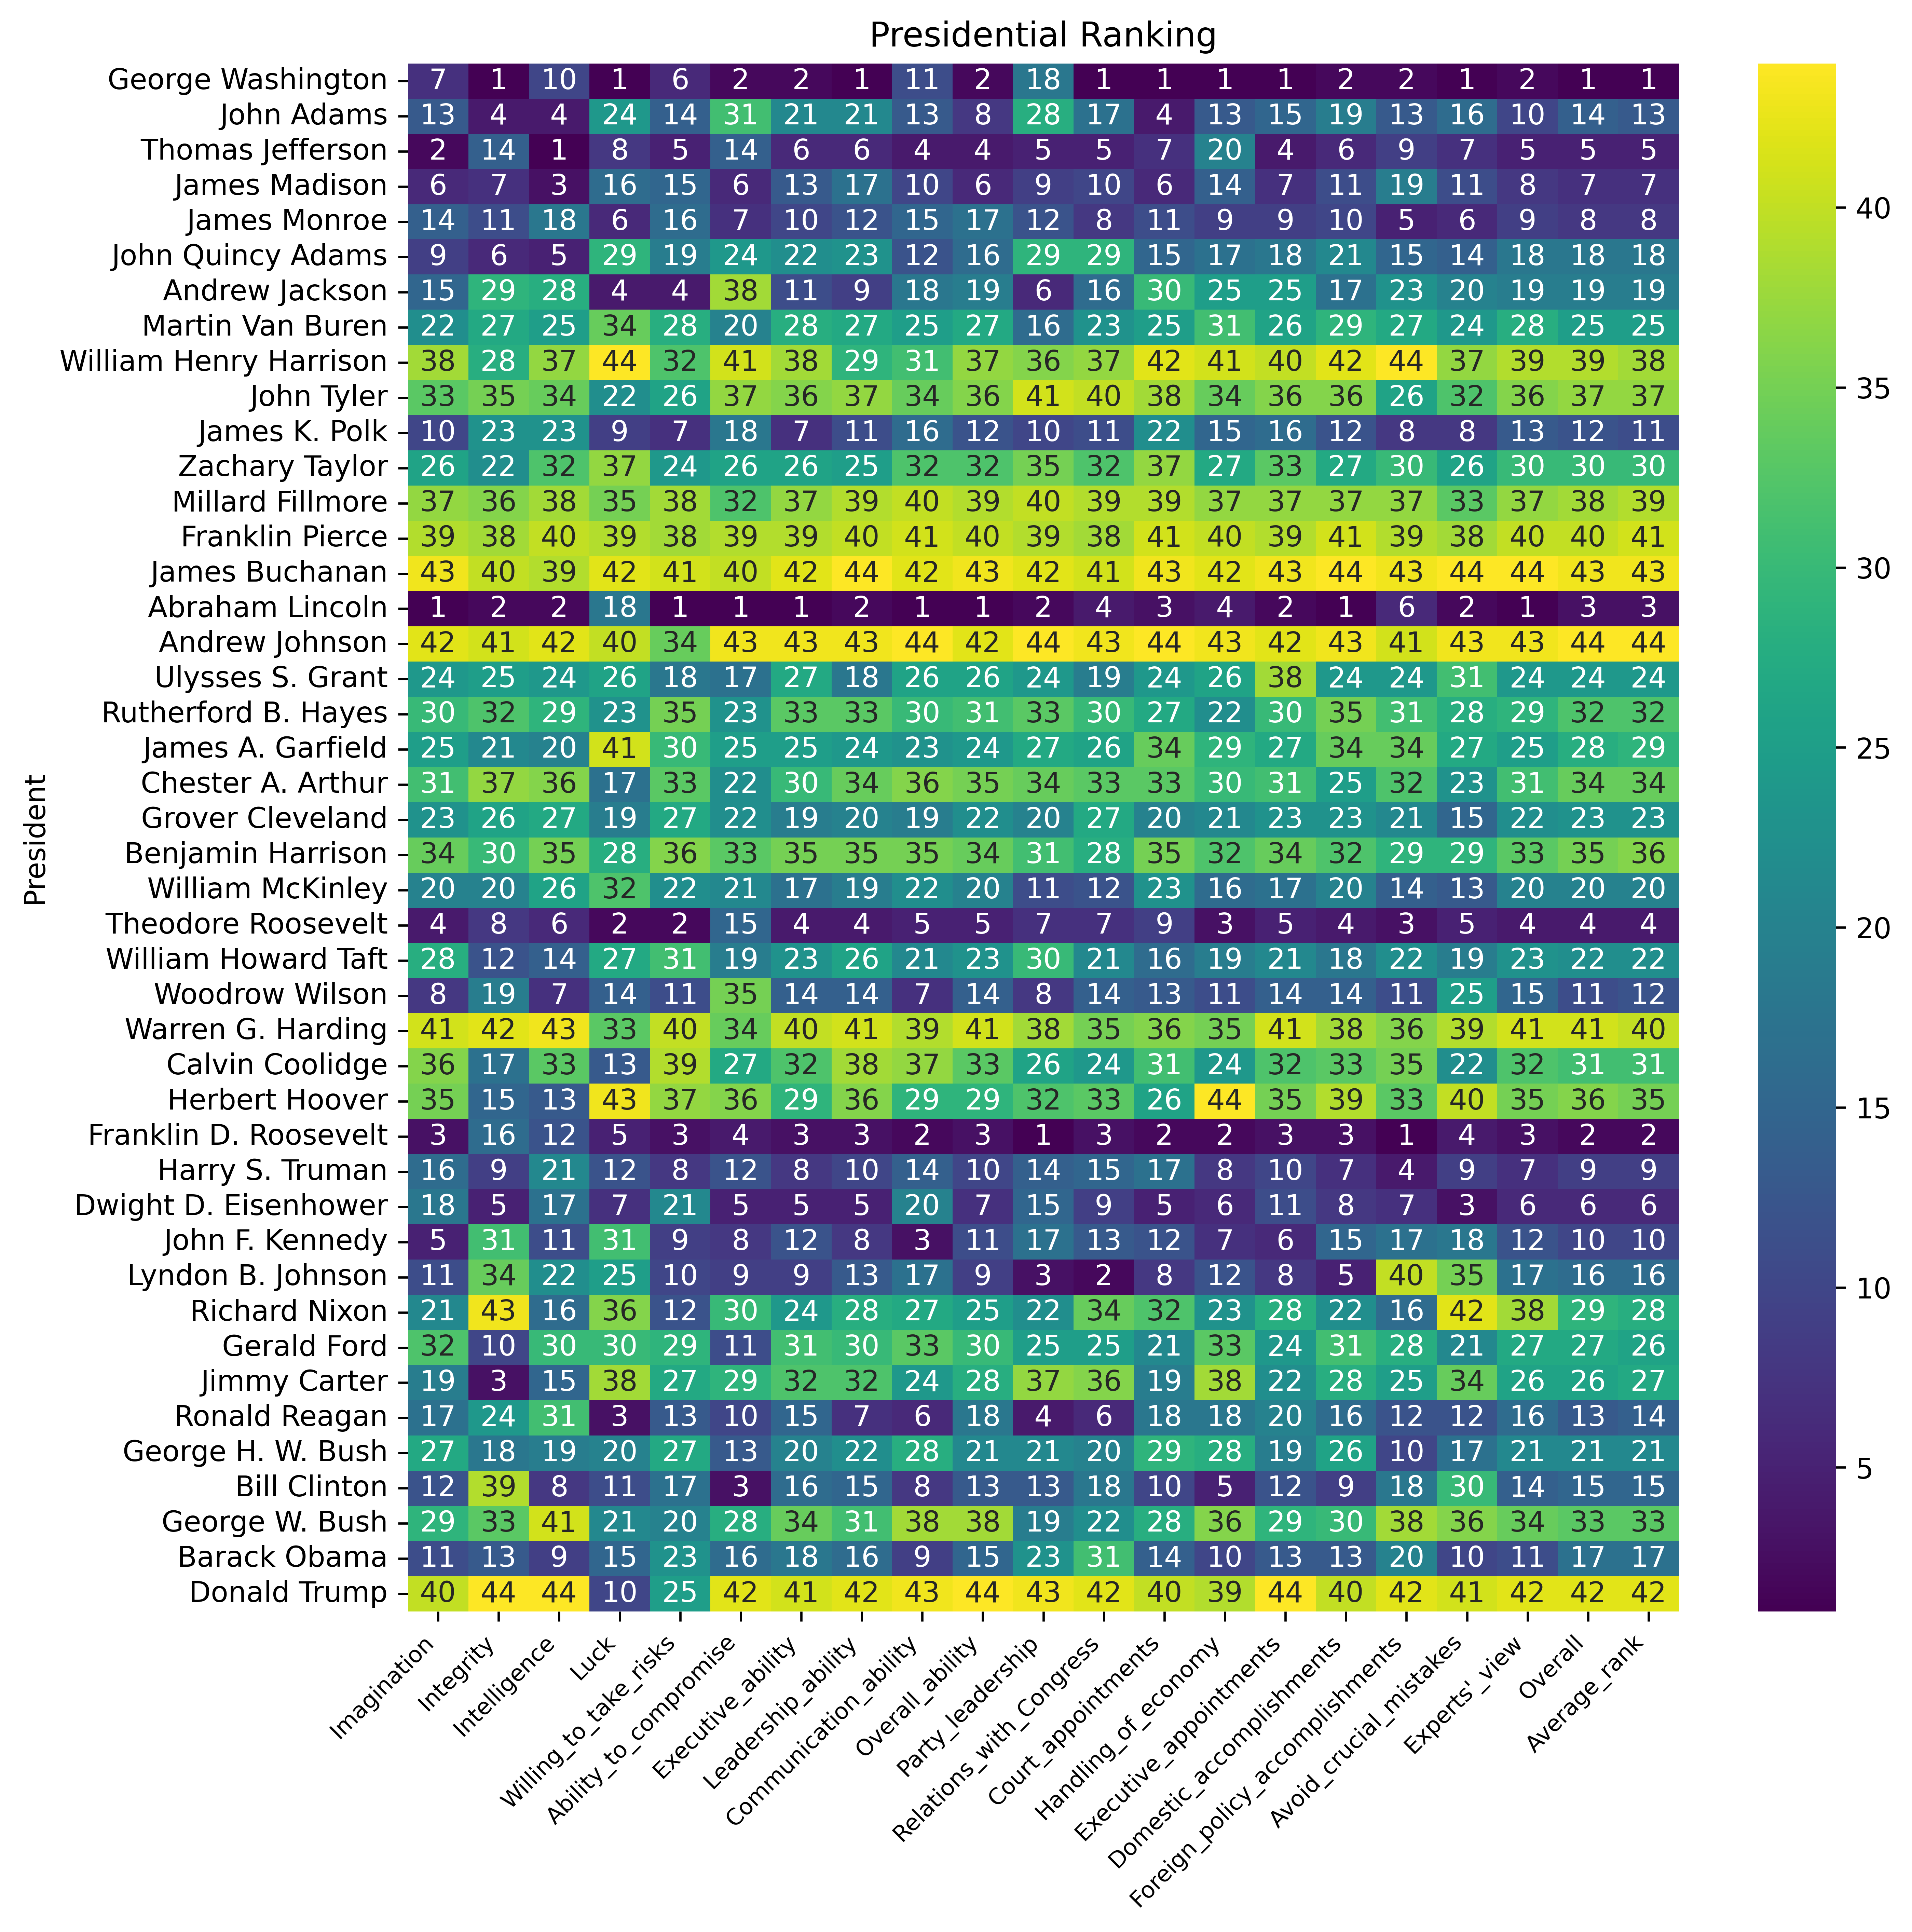

In [38]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=600)
g = sns.heatmap((tweak_siena_pres(df2)
                .set_index('President')
                .iloc[:, 2:-1]
                ),annot=True, cmap='viridis', ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=8, ha='right')
plt.title('Presidential Ranking')

## 17.2